<a href="https://colab.research.google.com/github/cf807/590_homework3/blob/main/590_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Christopher Fiaschetti

ANLY 590

Homework 3


I would like to denote that at submission time, there were still issues that were being worked through for some models. I plan on continuing to refine the models

In [13]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from tensorflow.keras.models import Sequential


from google.colab import drive
import numpy as np
import pandas as pd
import os
import keras

In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [53]:
#os.listdir("gdrive/MyDrive/cifar-10-batches-py/")

In [52]:
#os.listdir("gdrive/MyDrive")

This is homwork 3 for ANLY 590


# 1

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


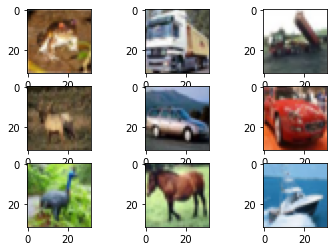

In [45]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [100]:
import keras
from keras import layers

encoding_dim = 32  

input_img = keras.Input(shape=(3072,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
decoded = layers.Dense(3072, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [101]:
from keras.datasets import cifar10
(x_train, _), (x_test, _) = cifar10.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
#print(x_test)



(50000, 3072)
(10000, 3072)


In [102]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=1500, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/10
34/34 [==============================] - 8s 228ms/step - loss: 0.6812 - val_loss: 0.6622
Epoch 2/10
34/34 [==============================] - 8s 227ms/step - loss: 0.6519 - val_loss: 0.6434
Epoch 3/10
34/34 [==============================] - 8s 236ms/step - loss: 0.6380 - val_loss: 0.6343
Epoch 4/10
34/34 [==============================] - 8s 237ms/step - loss: 0.6309 - val_loss: 0.6281
Epoch 5/10
34/34 [==============================] - 8s 233ms/step - loss: 0.6245 - val_loss: 0.6218
Epoch 6/10
34/34 [==============================] - 8s 226ms/step - loss: 0.6199 - val_loss: 0.6191
Epoch 7/10
34/34 [==============================] - 6s 191ms/step - loss: 0.6183 - val_loss: 0.6160
Epoch 8/10
34/34 [==============================] - 8s 233ms/step - loss: 0.6133 - val_loss: 0.6126
Epoch 9/10
34/34 [==============================] - 8s 228ms/step - loss: 0.6147 - val_loss: 0.6115
Epoch 10/10
34/34 [==============================] - 7s 201ms/step - loss: 0.6101 - val_loss: 0.6094

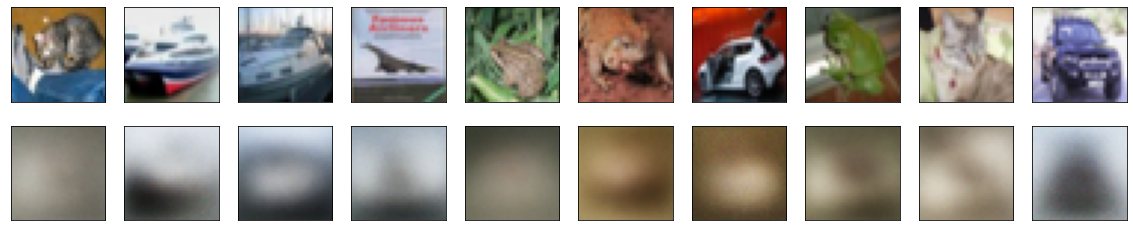

In [104]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

As can be seen above, there is still more work to be done in order to refine the model and make it more accurate

# 2

In [50]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape =(32,32,3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [51]:
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [52]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

In [69]:
(TrainX, TrainY), (TestX, TestY) = cifar10.load_data()

In [70]:
print(trainX.shape)
print(TrainY.shape)
print(TestX.shape)
print(TestY.shape)
print(TrainY)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [71]:
TrainX = TrainX.astype('float32') / 255.
TestX = TestX.astype('float32') / 255.
TrainX = TrainX.reshape((len(TrainX), np.prod(TrainX.shape[1:])))
TestX = TestX.reshape((len(TestX), np.prod(TestX.shape[1:])))
print(TrainX.shape)
print(TestX.shape)
print(TrainY.shape)
print(TestY.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


In [87]:
model.fit(TrainX, TrainY,
          batch_size=1000,
          epochs=10,
          verbose=1,
          validation_data=(TestX, TestY))

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', shape=(3072,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [48]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [89]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1 = model.fit(TrainX, TrainY, epochs=10, 
                    validation_data=(TestX, TestY))

Epoch 1/10


ValueError: ignored

In [91]:
plt.plot(model1.history['accuracy'], label='accuracy')
plt.plot(model1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(TrainX,  TestY, verbose=2)

NameError: ignored

In [ ]:
print(test_acc)

0.7139000296592712


### B

In [95]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(200,200,3))
model = Sequential()
conv_base.trainable=False
model.add(conv_base)
model.add(layers.GlobalMaxPool2D())
model.add(layers.Dense(120,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               61560     
Total params: 14,776,248
Trainable params: 61,560
Non-trainable params: 14,714,688
_________________________________________________________________


In [96]:
model.fit(TrainX, TrainY, epochs=1, batch_size=16, validation_data=(TrainX, TestY))

ValueError: ignored

# 3

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [32]:
spam_data = pd.read_csv("gdrive/MyDrive/SPAM_detection.csv")

In [74]:
chars = sorted(list(set(spam_data.Message)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 5157


In [75]:
maxlen = 40
step = 3
sub_sequences = []
next_chars = []
for i in range(0, len(spam_data.Message) - maxlen, step):
    sub_sequences.append(spam_data.Message[i: i + maxlen])
    next_chars.append(spam_data.Message[i + maxlen])
print('nb sequences:', len(sub_sequences))

nb sequences: 1844


In [76]:
k=300
print("(Sequence):\n" + sub_sequences[k])
print("\n(Target Character): \n" + next_chars[k])

900    (Sequence):\nYour free ringtone is waiting to ...
901    (Sequence):\nProbably money worries. Things ar...
902    (Sequence):\nHow is it possible to teach you. ...
903    (Sequence):\nI wonder if your phone battery we...
904    (Sequence):\nLovely smell on this bus and it a...
905    (Sequence):\nWe're all getting worried over he...
906    (Sequence):\nHey what's up charles sorry about...
907    (Sequence):\nall the lastest from Stereophonic...
908    (Sequence):\nI.ll give her once i have it. Plu...
909         (Sequence):\nWHITE FUDGE OREOS ARE IN STORES
910    (Sequence):\nJanuary Male Sale! Hot Gay chat n...
911    (Sequence):\nMy love ! How come it took you so...
912                 (Sequence):\nI am sorry it hurt you.
913    (Sequence):\nCan't. I feel nauseous. I'm so pi...
914    (Sequence):\nOk lor but not too early. Me stil...
915    (Sequence):\nCall me da, i am waiting for your...
916    (Sequence):\nI could ask carlos if we could ge...
917    (Sequence):\nWas actuall

In [77]:
X = np.zeros((len(sub_sequences), maxlen, len(chars)), dtype=np.uint8 )
Y = np.zeros((len(sub_sequences), len(chars)), dtype=np.uint8)
for i, seq in enumerate(sub_sequences):
    for t, char in enumerate(seq):
        X[i, t, char_indices[char]] = 1
        Y[i, char_indices[next_chars[i]]] = 1

In [78]:
char_rnn = Sequential()
char_rnn.add(tfkl.LSTM(128, input_shape=(maxlen, len(chars))))
char_rnn.add(tfkl.Dense(len(chars),activation="softmax"))

In [79]:
char_rnn.compile(loss='categorical_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01))

In [80]:
char_rnn.fit(X,Y, epochs=20, batch_size=1024)

Epoch 1/20
2/2 [==============================] - 7s 3s/step - loss: 8.5537
Epoch 2/20
2/2 [==============================] - 7s 3s/step - loss: 8.4384
Epoch 3/20
2/2 [==============================] - 7s 3s/step - loss: 8.4528
Epoch 4/20
2/2 [==============================] - 7s 3s/step - loss: 8.1995
Epoch 5/20
2/2 [==============================] - 7s 3s/step - loss: 8.0097
Epoch 6/20
2/2 [==============================] - 7s 3s/step - loss: 7.7209
Epoch 7/20
2/2 [==============================] - 7s 3s/step - loss: 7.5534
Epoch 8/20
2/2 [==============================] - 7s 3s/step - loss: 7.4254
Epoch 9/20
2/2 [==============================] - 7s 3s/step - loss: 7.4219
Epoch 10/20
2/2 [==============================] - 7s 3s/step - loss: 7.2746
Epoch 11/20
2/2 [==============================] - 7s 3s/step - loss: 7.2435
Epoch 12/20
2/2 [==============================] - 7s 3s/step - loss: 7.2079
Epoch 13/20
2/2 [==============================] - 8s 4s/step - loss: 6.9718
Epoch 14

In [83]:
def draw_char(probs):
    probs = np.asarray(probs).astype('float64')
    if sum(probs) != 1.0:
      probs = probs / np.sum(probs)
    draw = np.random.choice(range(len(probs)) , p=probs)
    return draw

def sample_text(model, sample_length=100):
    start = np.random.randint(0, len(spam_data.Message) - maxlen - 1)
    sequence = spam_data.Message[start: start + maxlen]
  
    x_preds = np.zeros((sample_length, maxlen, len(chars)))
    for i in range(sample_length):
        for t, char in enumerate(sequence[-maxlen:]):
            x_preds[i, t, char_indices[char]] = 1.

        preds = model.predict(np.expand_dims(x_preds[i,:,:], axis=0), verbose=0)[0]
        next_index = draw_char(preds)
        next_char = indices_char[next_index]

        sequence += next_char
    return sequence

In [84]:
sim = sample_text(char_rnn,sample_length=500) 

KeyError: ignored

In [ ]:
print(sim)

In [34]:
print(spam_data.Message[1].split(' '))
print(spam_data.Message[1])
type(spam_data.Message[1])

['Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']
Ok lar... Joking wif u oni...


str

In [35]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Spam_df = pd.DataFrame(mlb.fit_transform(spam_data.Message.str.split(' ')),
                   columns=mlb.classes_,
                   index=spam_data.index)

#Spam_df.head()
Spam_df['category_val'] = spam_data.category_val
print(Spam_df.head())
print(Spam_df.loc[(Spam_df.sum(axis=1) != 0), (Spam_df.sum(axis=0) != 0)].head())


trainX, testX, trainy, testy = train_test_split(Spam_df.iloc[:, 0:15686], Spam_df.iloc[:, 15687], test_size=0.3, random_state=42)

      !  !!  !!!  !!!!  !!''.  !1  ...  –  “  “Harry  …  ….  …Thanks  category_val
0  0  0   0    0     0      0   0  ...  0  0       0  0   0        0             0
1  0  0   0    0     0      0   0  ...  0  0       0  0   0        0             0
2  0  0   0    0     0      0   0  ...  0  0       0  0   0        0             1
3  0  0   0    0     0      0   0  ...  0  0       0  0   0        0             0
4  0  0   0    0     0      0   0  ...  0  0       0  0   0        0             0

[5 rows x 15689 columns]
      !  !!  !!!  !!!!  !!''.  !1  ...  –  “  “Harry  …  ….  …Thanks  category_val
0  0  0   0    0     0      0   0  ...  0  0       0  0   0        0             0
1  0  0   0    0     0      0   0  ...  0  0       0  0   0        0             0
2  0  0   0    0     0      0   0  ...  0  0       0  0   0        0             1
3  0  0   0    0     0      0   0  ...  0  0       0  0   0        0             0
4  0  0   0    0     0      0   0  ...  0  0       0  0   0  

In [ ]:
#recurring Neural net

In [36]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=15687, output_dim=1))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 1)           15687     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 83,537
Trainable params: 83,537
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)



In [40]:
# trainX, testX, trainy, testy
model.fit(trainX, trainy, validation_data=(testX, testy), epochs=10)

RuntimeError: ignored

In [41]:
# 1D CNN
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[0], trainX.shape[1], trainy.shape[0]
	model = Sequential()
	model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(layers.Dropout(0.5))
	model.add(layers.MaxPooling1D(pool_size=2))
	model.add(layers.Flatten())
	model.add(layers.Dense(100, activation='relu'))
	model.add(layers.Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy


In [42]:
print(trainX.shape[0])
n_timesteps, n_features, n_outputs = trainX.shape[0], trainX.shape[1], trainy.shape[0]
print(n_timesteps)
print(n_features)
print(n_outputs)

3900
3900
15686
3900


In [43]:
model.fit(trainX, trainy, validation_data=(testX, testy), epochs=10)

RuntimeError: ignored

In [ ]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

### C

As can be seen I'm having trouble with my models in this section. My impressions are that preprocessing must be done better here. I havent been able to visualize this section yet as a result of my models not working properly